In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # silence annoying warnings

# Load the dataset

In [32]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

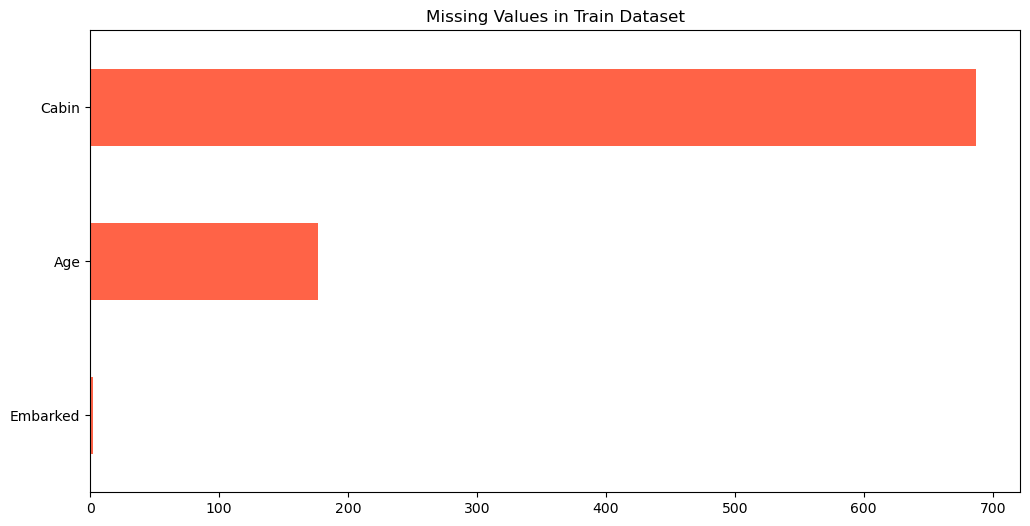

In [39]:
missing.plot.barh(figsize=(12, 6), color='tomato')
plt.title('Missing Values in Train Dataset')
plt.show()

# Univariate Analysis

## Target variable

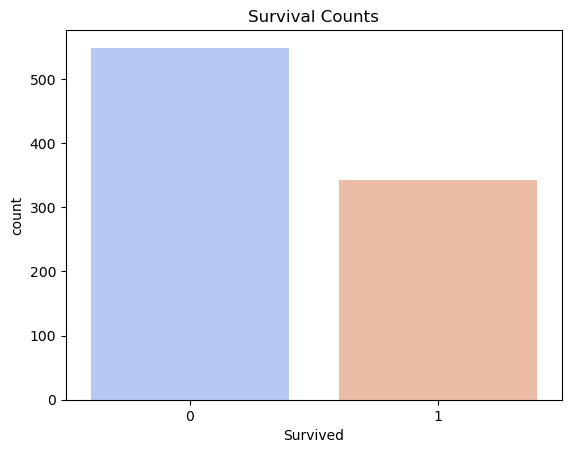

In [40]:
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.title('Survival Counts')
plt.show()

## Categorical Features

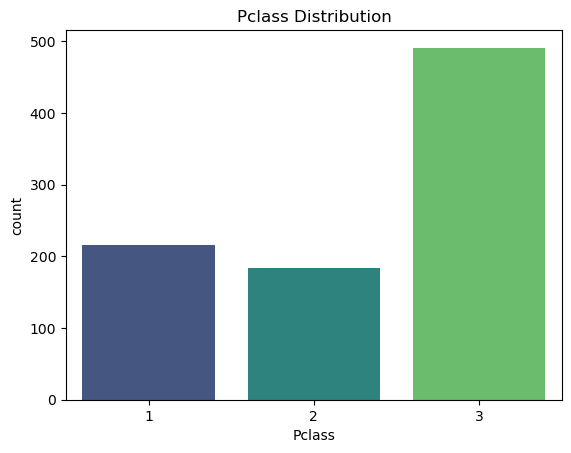

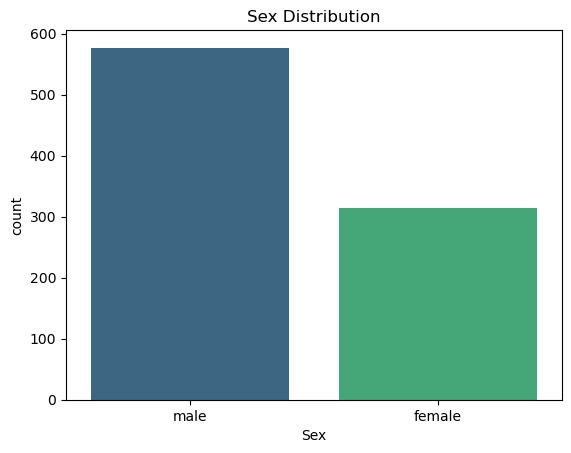

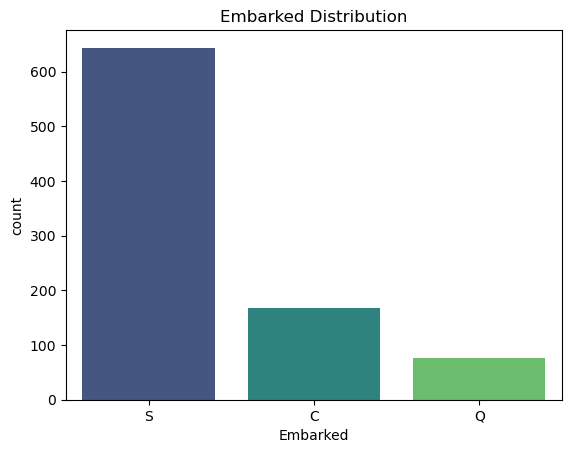

In [41]:
categorical = ['Pclass', 'Sex', 'Embarked']
for col in categorical:
    sns.countplot(x=col, data=train, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.show()

## Numerical Features

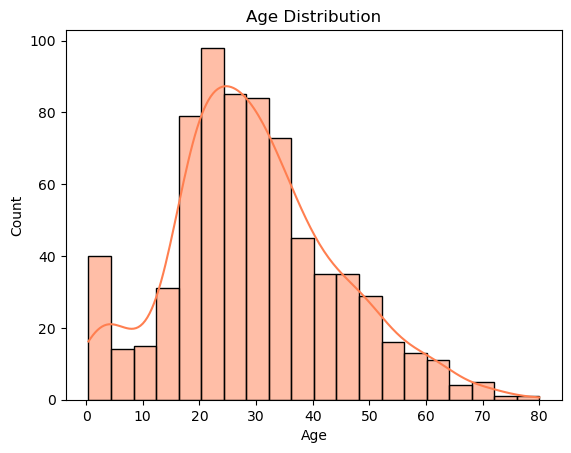

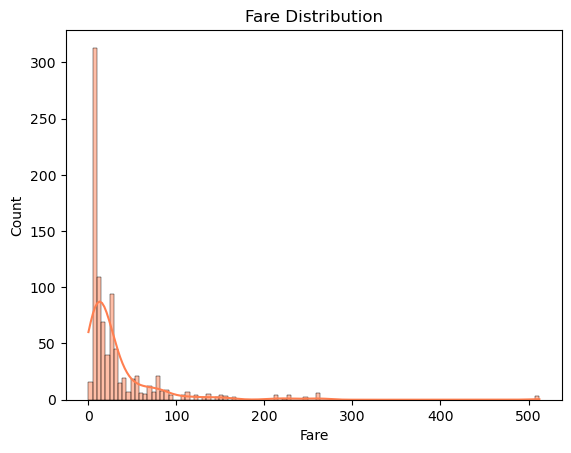

In [42]:
numerical = ['Age', 'Fare']
for col in numerical:
    sns.histplot(train[col], kde=True, color='coral')
    plt.title(f'{col} Distribution')
    plt.show()

# Bivariate Analysis

## Survival vs Categorical

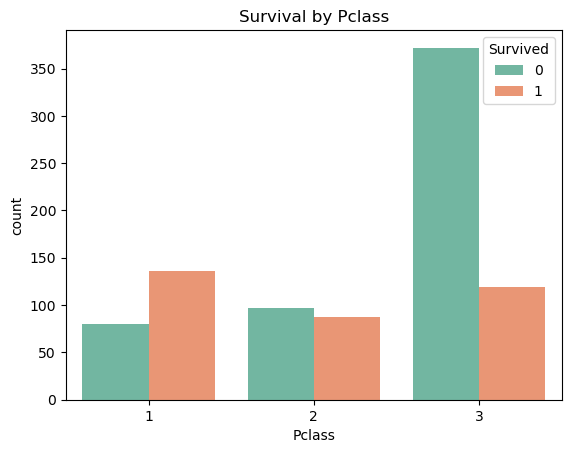

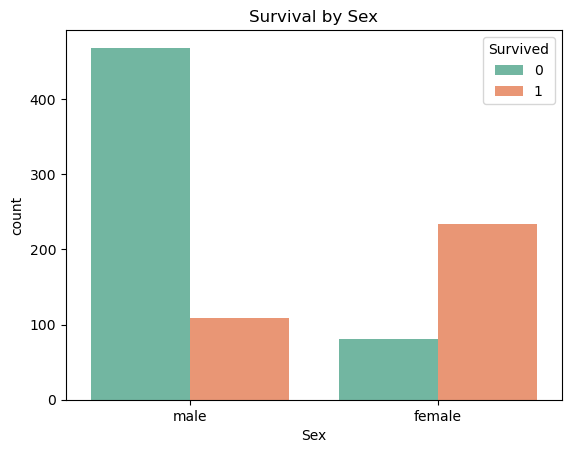

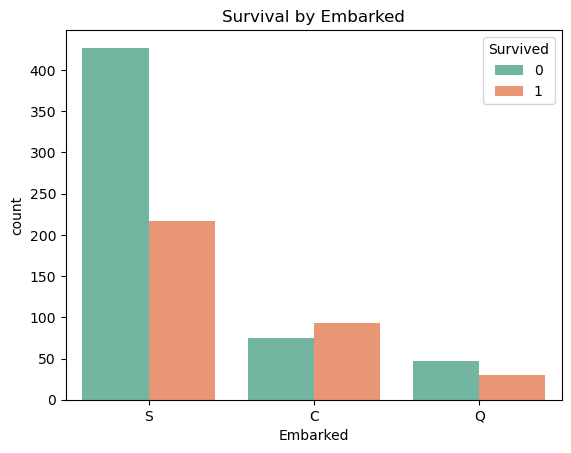

In [43]:
for col in categorical:
    sns.countplot(x=col, hue='Survived', data=train, palette='Set2')
    plt.title(f'Survival by {col}')
    plt.show()

##  Survival vs Numerical

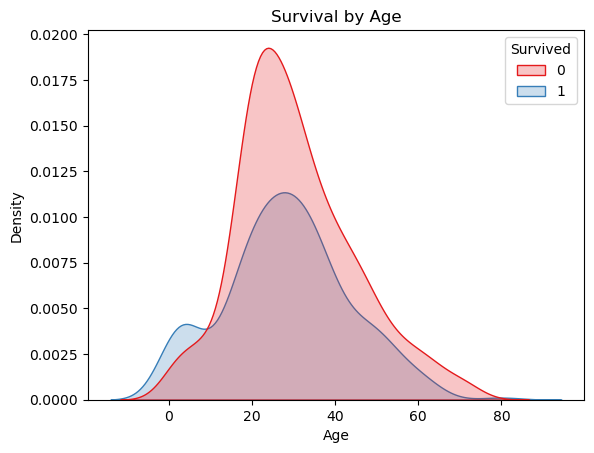

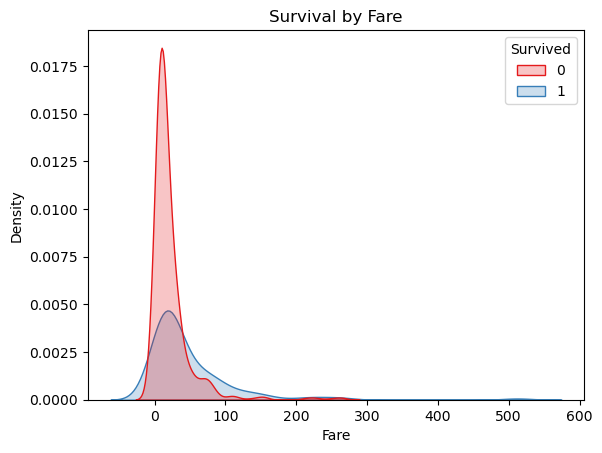

In [44]:
for col in numerical:
    sns.kdeplot(data=train, x=col, hue='Survived', fill=True, palette='Set1')
    plt.title(f'Survival by {col}')
    plt.show()

# Correlation

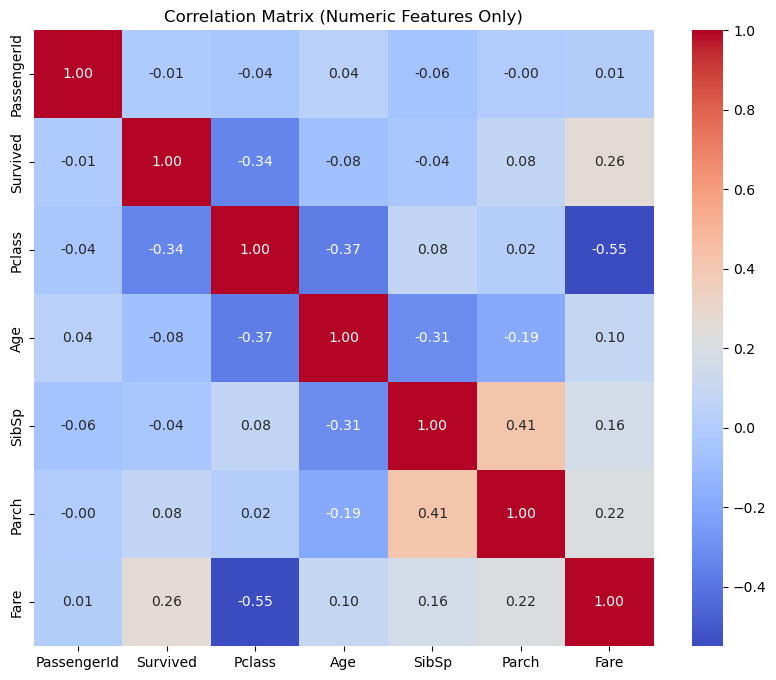

In [45]:
corr = train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

# Cleaning Data

## Fixing Missing Values
The EDA demonstrated a noticeble data missing in the columns "cabin, age, and embarked", we should either drop them if they are too messy or deal with them.

In [46]:
# fill the missing age values with the average
train['Age'].fillna(train['Age'].median(), inplace=True)

# fill the missing embarked values withe the most frequent value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# drop the cabin column bcs it's too messy
train.drop(columns=['Cabin'], inplace=True)

In [47]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
# convert gender to 0s and 1s cuz models need numeric vals
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train, embarked_dummies], axis=1)
train.drop('Embarked', axis=1, inplace=True)

# Drop Name and Ticket (too messy for now)
train.drop(columns=['Name', 'Ticket'], inplace=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True


In [50]:
train.to_csv("..\data\cleaned_titanic.csv", index=False)